In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # deaktiviert Warnungen 
%matplotlib inline

In [2]:
from Modell.m_single import Platte as pl
from Modell.m_single import Kugel as kl
from Modell.m_multiple import m_multiple
from Modell.m_noniso import m_noniso
from Modell.m_hierarchisch import m_hierarchisch

### **Frequency Response Modell**
+ Parameter:
    + **delta: charakristische Funktion**
    + **eta: Parameter in der Frequency Response zur Substitution**
    + **omega: Winkelfrequenz [1/s]**
    + **gamma: ein Maß für die Nichtisothermie des Adsorbat-Adsorbens-Systems**
    + **K_omega: relative Gleichgewichtskonstante der Konzentration in den Speicherporen im Verhältnis zu den Transportporen**
    + **f: Frequenz [1/s]**
    + **t_D: Diffusionszeit r^2(L^2)/D [s]**
    + **t_h: Zeitkonstante für den Wärmeaustausch zwischen dem Adsorptionsmittel und seiner Umgebung [s]**
    + **t_R: Zeitkonstante für den Massenaustausch zwischen den beiden Porensorten [s]**
    + **a: Kugelradius [m]**
    + **m: Probenmasse [kg]**
    + **der Anstieg der Isothermen im Gleichgewicht**
    + **2L: Dicke von der ebenen Platte [m]**
    + **D: Diffusionskoeffizient [m^2/s]**
    + **R: Gaskonstante = 8.314 J/molK**
    + **T_0: Versuchstemperatur [K]**
    + **V_0: Ausgangsvolumen [m^3]**
+ Index:
    + 0: Ausgangsdaten
    + **1: Platte, der Index „1“ steht für die 1-dimensionale Betrachtung**
    + **3: Kugel, der Index „3“ steht für die 1-dimensionale Betrachtung**
    + **c: in-phase**
    + **s: out-of-phase**

### **1.3 Anwendung der theoretischen Modelle**
#### **Charakteristische in-phase Funktion** 
+ **Initialisieren**
    + **Ebene Platte:**
        + Dicke von der Platte: **2L = 10^-6 m**
        + Diffusionskoeffizient **D = 10^-14 m^2/s**
    + **Kugel:** 
        + Partikeldurchmesser **2a = 10^-6 m**
        + Diffusionskoeffizient **D = 1e-14 m^2/s**

In [3]:
# die Funktion beschreibt die Verläufe der charakteristischen Funktionen von Platten- und Kugelmodell(In-phase)
# enthält 4 Parameter von den beiden Modelle
def th_chara_in_1(L, a, D, f, K=1):
    labels = ['Ebene Platte', 'Kugel']
    colors = ['r', 'g']
    # Gibt die Größe des Bilds an
    plt.figure(figsize = (10,8))
    
    # Initialisieren 
    x, platte, kugel = [f, pl(L, D, f, K), kl(a, D, f, K)]
    
    # Ruft die Methode von zwei Klassen
    y = [platte.func_chara_1c(), kugel.func_chara_3c()]
    
    # Gibt den Namen des Parameters und die Linienfarbe und -breite usw. an und zeichnen
    # Rot:Ebene Platte, Grün:Kugel
    for i in range(2):
        plt.plot(x, y[i], label = labels[i], linewidth = 2, color=colors[i])
    
    # Gibt die Ausdehnung der Achsen an.
    plt.xlim(0.001,10), plt.ylim(0,1)
    
    # Die x-Achse nimmt eine nichtlineare Koordinatenachse bzw. die logarithmische Achse an 
    plt.xscale('log'), plt.yscale('linear')
    
    # Fügt den Achsen Koordinaten hinzu
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1], [0.001,0.01,0.1,1,10], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], rotation = 0, fontsize = 14, x = -0.01)
    
    # Benennen die Achsen und das gesamte Bild
    plt.ylabel('charakteristische in-phase Funktion', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 10)
    plt.title("Verläufe der charakteristischen Funktionen von Platten- und Kugelmodell(In-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)

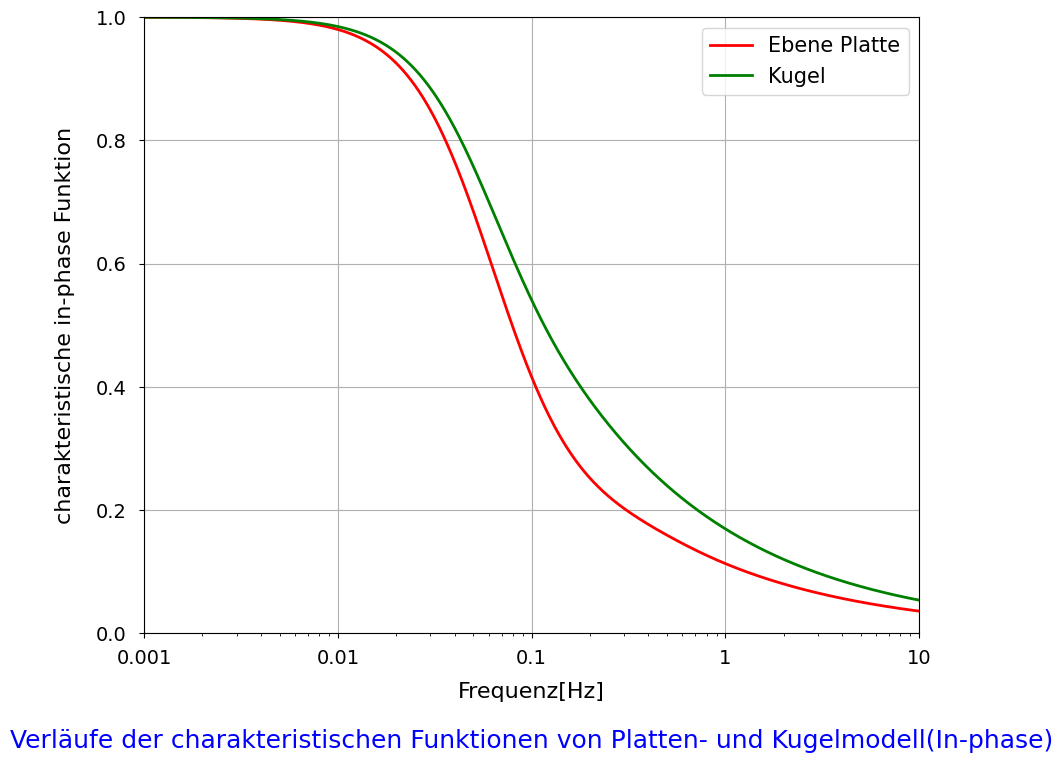

In [4]:
# Verwendet numpy, um eine Folge von 100.000 Zahlen mit einer gleichmäßigen Verteilung von 0,001 bis 1 zu generieren
np_f = np.linspace(start = 0.001, stop = 10, num = 100000)
# Ruft die Funktion func_chara_inphase auf und gibt die Parameter an
abb_inphase = th_chara_in_1(L = 5e-7, a = 5e-7, D = 1e-14, f = np_f)
abb_inphase

#### **Charakteristische out-of-phase Funktion**
+ **Initialisieren**
    + **Ebene Platte:**
        + Dicke von der Platte: **2L = 10^-6 m**
        + Diffusionskoeffizient **D = 10^-14 m^2/s**
    + **Kugel:** 
        + Partikeldurchmesser **2a = 10^-6 m**
        + Diffusionskoeffizient **D = 1e-14 m^2/s**

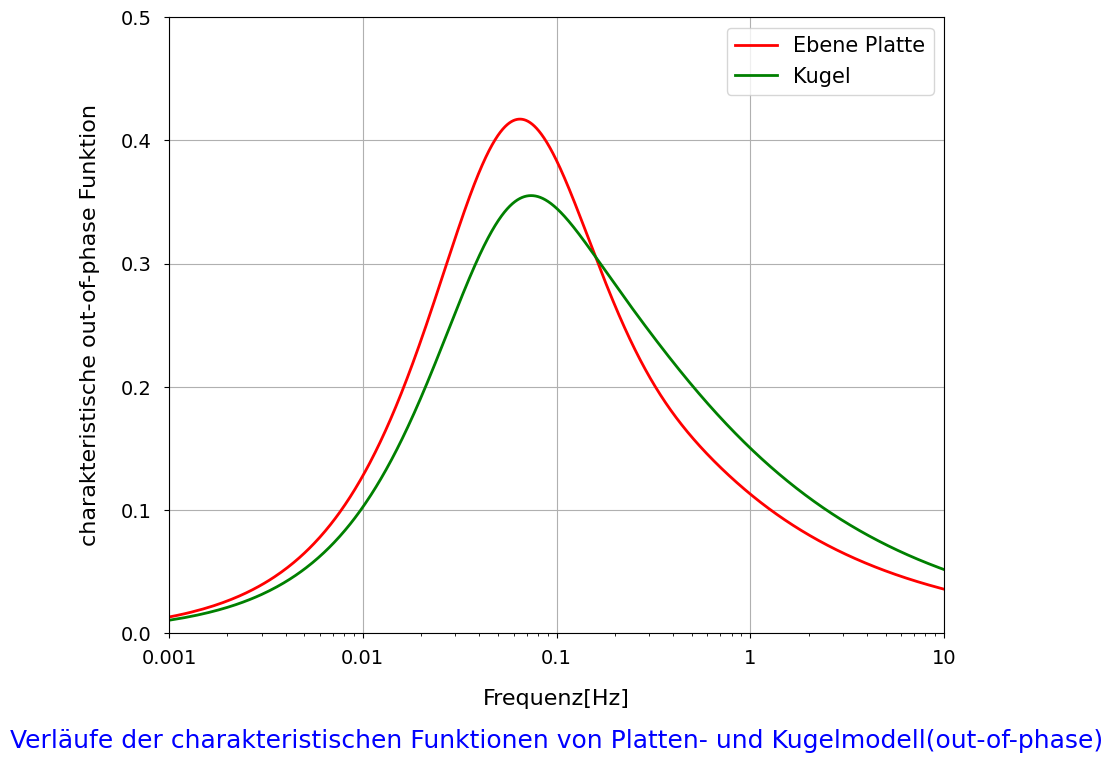

In [5]:
# die Funktion beschreibt die Verläufe der charakteristischen Funktionen von Platten- und Kugelmodell(out-of-phase)
# enthält 4 Parameter von den beiden Modelle
def th_chara_out_1(L, a, D, f, K=1):
    labels = ['Ebene Platte', 'Kugel']
    colors = ['r', 'g']
    # Gibt die Größe des Bilds an
    plt.figure(figsize = (10,8))
    
    x, platte, kugel = [f, pl(L, D, f, K), kl(a, D, f, K)]
    y = [platte.func_chara_1s(), kugel.func_chara_3s()]
    
    for i in range(2):
        plt.plot(x, y[i], label = labels[i], linewidth = 2, color=colors[i])
    
    plt.xlim(0.001,10), plt.ylim(0,0.5), plt.xscale('log'), plt.yscale('linear')    
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1], [0.001,0.01,0.1,1,10], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische out-of-phase Funktion', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Verläufe der charakteristischen Funktionen von Platten- und Kugelmodell(out-of-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)

# Ruft die Funktion func_chara_outphase auf und gibt die Parameter an
abb_outphase = th_chara_out_1(L = 5e-7, a = 5e-7, D = 1e-14, f = np.linspace(0.001, 10, num = 100000))
abb_outphase

### **1.3.1 Frequenz in Abhängigkeit von Partikeldurchmesser und Diffusionskoeffizienten**
#### **die charakteristische out-of-phase-Funktion abh. Diffusionskoeffizienten(δ3s)**
+ **Initialisieren**
    + **Kugel:** 
        + Kugeldurchmesser **2a = 10^-6 m**
        + Diffusionskoeffizienten **D = [1.5^-16 / 1.5^-14 / 1.5^-12] m^2/s**

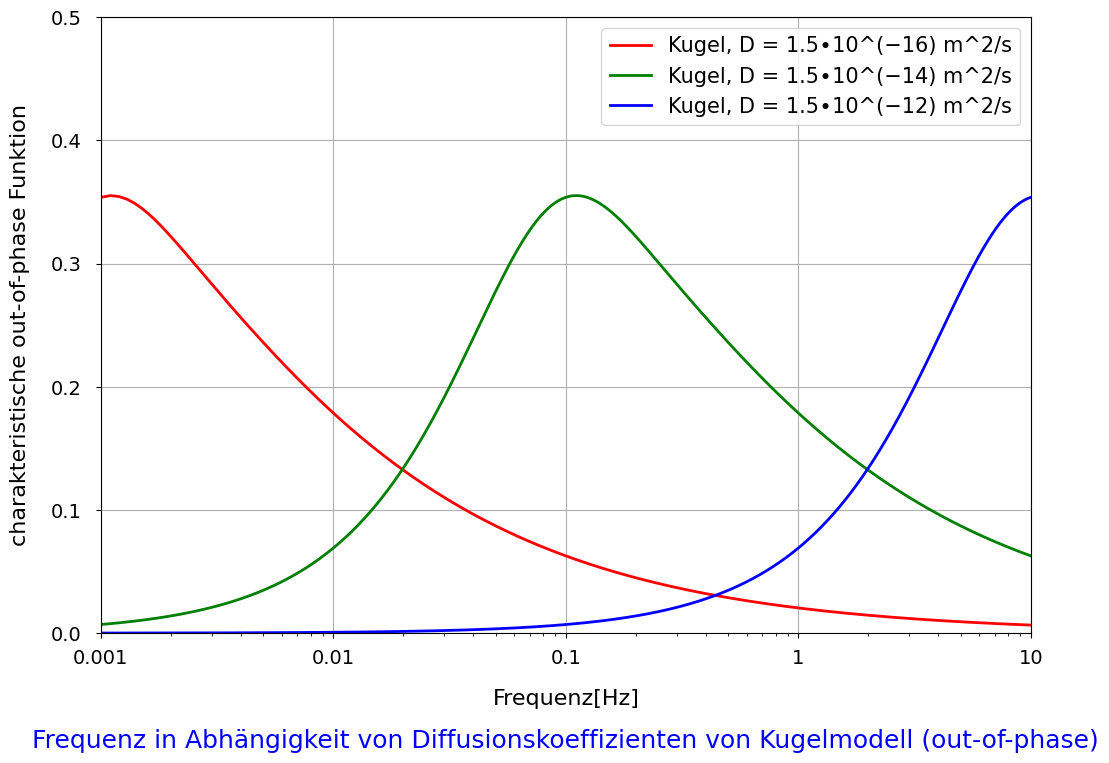

In [6]:
# die Funktion beschreibt Frequenz in Abhängigkeit von Diffusionskoeffizienten von Kugelmodell (out-of-phase)
# Die Funktion erwartet eine Liste von Diffusionskoeffizientenwerten
def th_chara_out_dk_1(a, list_D, f):
    labels = ['Kugel, D = 1.5∙10^(−16) m^2/s', 'Kugel, D = 1.5∙10^(−14) m^2/s', 'Kugel, D = 1.5∙10^(−12) m^2/s']
    colors = ['r', 'g', 'b']
    plt.figure(figsize = (12,8))
    
    x = f
    # Variable definieren
    k, y = list(), list()
    for i in range(3):
        # Initialisieren das Modell und zur Liste hinzufügen 
        k.append(kl(a, list_D[i], f, K = 1))
        # Ruft die Methode von der Klasse Platte
        y.append(k[i].func_chara_3s())
        # Diagramm zeichnen
        plt.plot(x, y[i], label = labels[i], linewidth = 2, color = colors[i])

    plt.xlim(0.001, 10), plt.ylim(0,0.4), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1], [0.001,0.01,0.1,1,10], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische out-of-phase Funktion', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Frequenz in Abhängigkeit von Diffusionskoeffizienten von Kugelmodell (out-of-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)

abb_outphase_diffkoeff = th_chara_out_dk_1(a = 5e-7, list_D = [1.5e-16, 1.5e-14, 1.5e-12], f = np.linspace(0.001, 10, num = 100000))
abb_outphase_diffkoeff

#### **die charakteristische out-of-phase-Funktion abh. Partikeldurchmesser(δ3s)**
+ **Initialisieren**
    + **Kugel:** 
        + Partikeldurchmesser **2a = [0.1µm, 1µm, 10µm]**
        + Diffusionskoeffizienten **D = 1.5^-14 m^2/s**

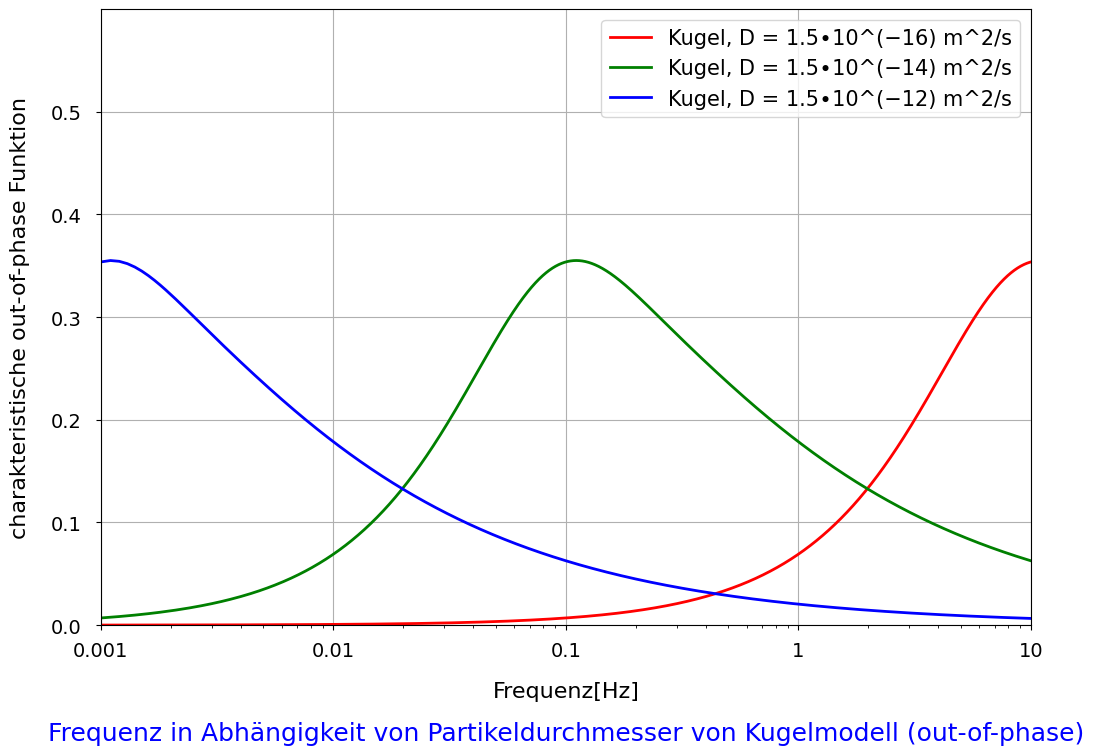

In [7]:
# die Funktion beschreibt Frequenz in Abhängigkeit von Partikeldurchmesser von Kugelmodell (out-of-phase)
# Die Funktion erwartet eine Liste von Partikeldurchmesserswerten 
def th_chara_out_dm_1(list_a, D, f):
    labels = ['Kugel, D = 1.5∙10^(−16) m^2/s', 'Kugel, D = 1.5∙10^(−14) m^2/s', 'Kugel, D = 1.5∙10^(−12) m^2/s']
    colors = ['r', 'g', 'b']
    plt.figure(figsize = (12,8))
    
    x = f
    k, y = list(), list()
    for i in range(3):
        k.append(kl(list_a[i], D, f, K = 1))
        y.append(k[i].func_chara_3s())
        plt.plot(x, y[i], label = labels[i], linewidth = 2, color = colors[i])
    
    plt.xlim(0.001, 10), plt.ylim(0,0.6), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1], [0.001,0.01,0.1,1,10], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische out-of-phase Funktion', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Frequenz in Abhängigkeit von Partikeldurchmesser von Kugelmodell (out-of-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)

abb_outphase_durchmesser = th_chara_out_dm_1(list_a = [5e-8, 5e-7, 5e-6], D = 1.5e-14, f = np.linspace(0.001, 10, num = 100000))
abb_outphase_durchmesser

#### **Zusammenhang zwischen Diffusionskoeffizient und Partikelradius bei verschiedenen Frequenzen**
+ **Annahme: eta_3 = const. = 1**
+ **Frequenz f = [10, 1, 0.1, 0.01, 0.001, 0.0001] Hz**

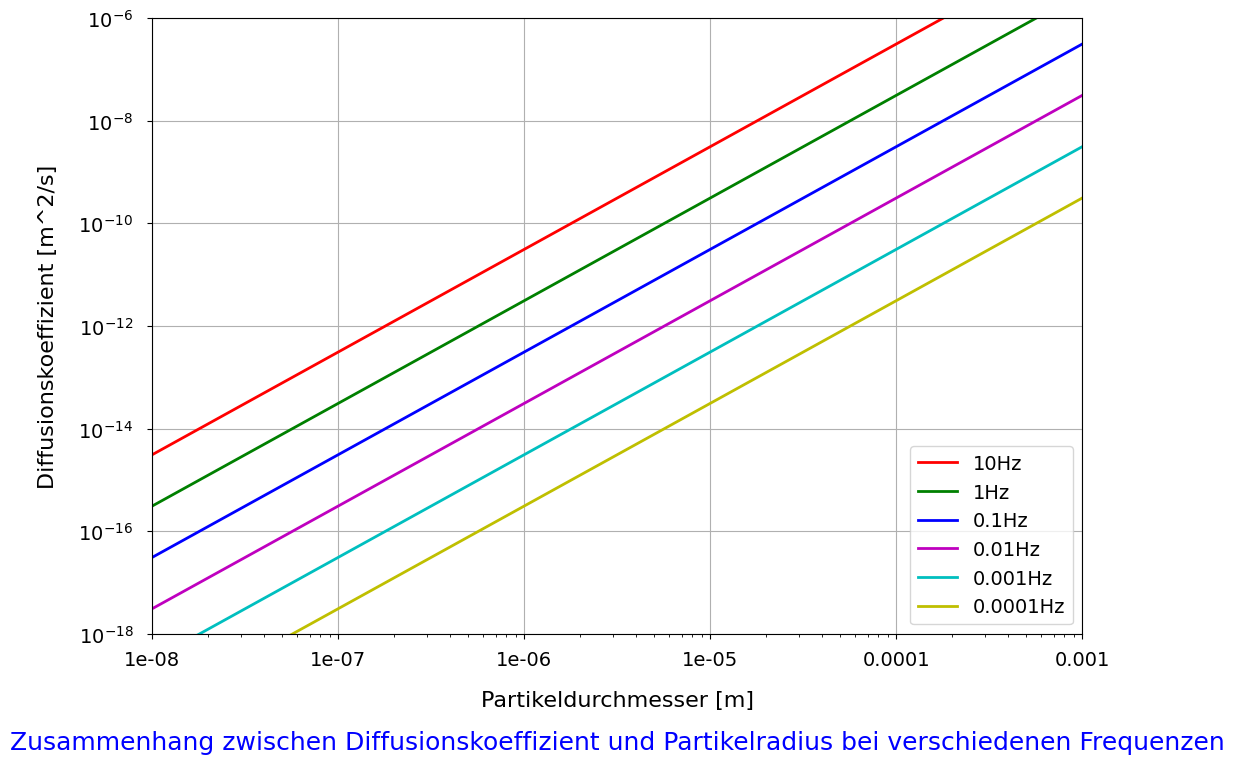

In [8]:
# Gibt die Formel von der Diffusionskoeffizient an
def func_Diff(f,a):
    return (4 * np.pi * f * a**2)

# die Funktion beschreibt den Zusammenhang zwischen Diffusionskoeffizient und Partikelradius bei verschiedenen Frequenzen
def th_dk_dm_1():
    labels = ['10Hz', '1Hz', '0.1Hz', '0.01Hz', '0.001Hz', '0.0001Hz']
    colors = ['r','g','b','m','c','y']
    list_f = [10,1,0.1,0.01,0.001,0.0001]
    plt.figure(figsize = (12,8))
    
    x = np.linspace(1e-8, 0.001, num = 10000)
    y = list()
    
    for i in range(6):
        y.append(func_Diff(list_f[i], a = x/2))
        plt.plot(x, y[i], label = labels[i], linewidth = 2, color = colors[i])
    
    plt.xlim(1e-8, 0.001), plt.ylim(1e-18, 1e-6), plt.xscale('log'), plt.yscale('log')
    plt.xticks([10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3], [1e-8,1e-7,1e-6,1e-5,0.0001,0.001], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([10**-18, 10**-16, 10**-14, 10**-12, 10**-10, 10**-8, 10**-6], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('Diffusionskoeffizient [m^2/s]', fontsize = 16, labelpad = 15)
    plt.xlabel('Partikeldurchmesser [m]', fontsize = 16, labelpad = 15)
    plt.title("Zusammenhang zwischen Diffusionskoeffizient und Partikelradius bei verschiedenen Frequenzen",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 4,fontsize = 14), plt.grid(True)
    
abb_diffkoeff_durchmesser = th_dk_dm_1()
abb_diffkoeff_durchmesser

### **1.3.2 Empfindlichkeit des Systems bei Volumenveränderung(Einfluss von K)**

+ **Annahme:**
    + Für jeden Versuch nahezu konstant
    + die Kurve überhöhen oder abflachen
    + 0.1 ≤ K ≤ 1.5
+ **Initialisieren**
    + Partikeldurchmesser von Kugel **2a = 1µm**
    + Diffusionskoeffizienten **D = 1.5^-14 m^2/s**
    + K = [0.1, 0.8, 1.5]

#### **Einfluss Von K auf die charakteristische Funktion Kδ3s(out-of-phase)**

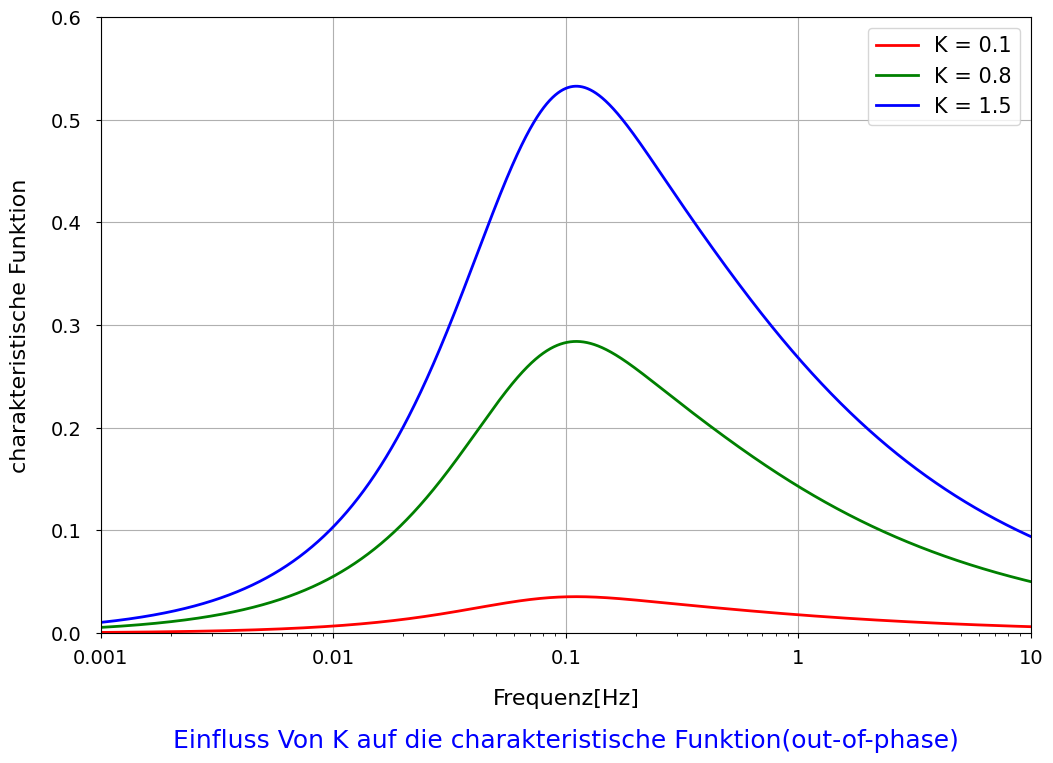

In [9]:
# Einfluss Von K auf die charakteristische Funktion(out-of-phase)
# Die Funktion erwartet eine Liste von K
def th_chara_out_K_1(a, D, f, list_K):
    labels = ['K = 0.1', 'K = 0.8', 'K = 1.5']
    colors = ['r', 'g', 'b']
    plt.figure(figsize = (12,8))
    
    x = f
    k, y = list(), list()
    for i in range(3):
        k.append(kl(a, D, f, list_K[i]))
        y.append(k[i].func_chara_3s())
        plt.plot(x, y[i], label = labels[i], linewidth = 2, color = colors[i])
    
    plt.xlim(0.001,10), plt.ylim(0, 0.6), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1], [0.001,0.01,0.1,1,10], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische Funktion', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Einfluss Von K auf die charakteristische Funktion(out-of-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)

abb_outphase_K = th_chara_out_K_1(a = 5e-7, D = 1.5e-14, f = np.linspace(0.001, 10, num = 500000), list_K = [0.1, 0.8, 1.5])
abb_outphase_K

### **1.3.3 Einfluss der Partikelmorphologie auf die Kurvenform**
+ **Initialisieren**
    + **die charakteristische Funktion vom Plattenmodell Kδ1s**
        + Partikeldurchmesser **2L = 1µm**
        + Diffusionskoeffizienten **D = 1.7^-14 m^2/s**
        + **K = 0.85**
    + **die charakteristische Funktion vom Kugelmodell Kδ3s**
        + Partikeldurchmesser **2a = 1µm**
        + Diffusionskoeffizienten **D = 1.5^-14 m^2/s**
        + **K = 1**

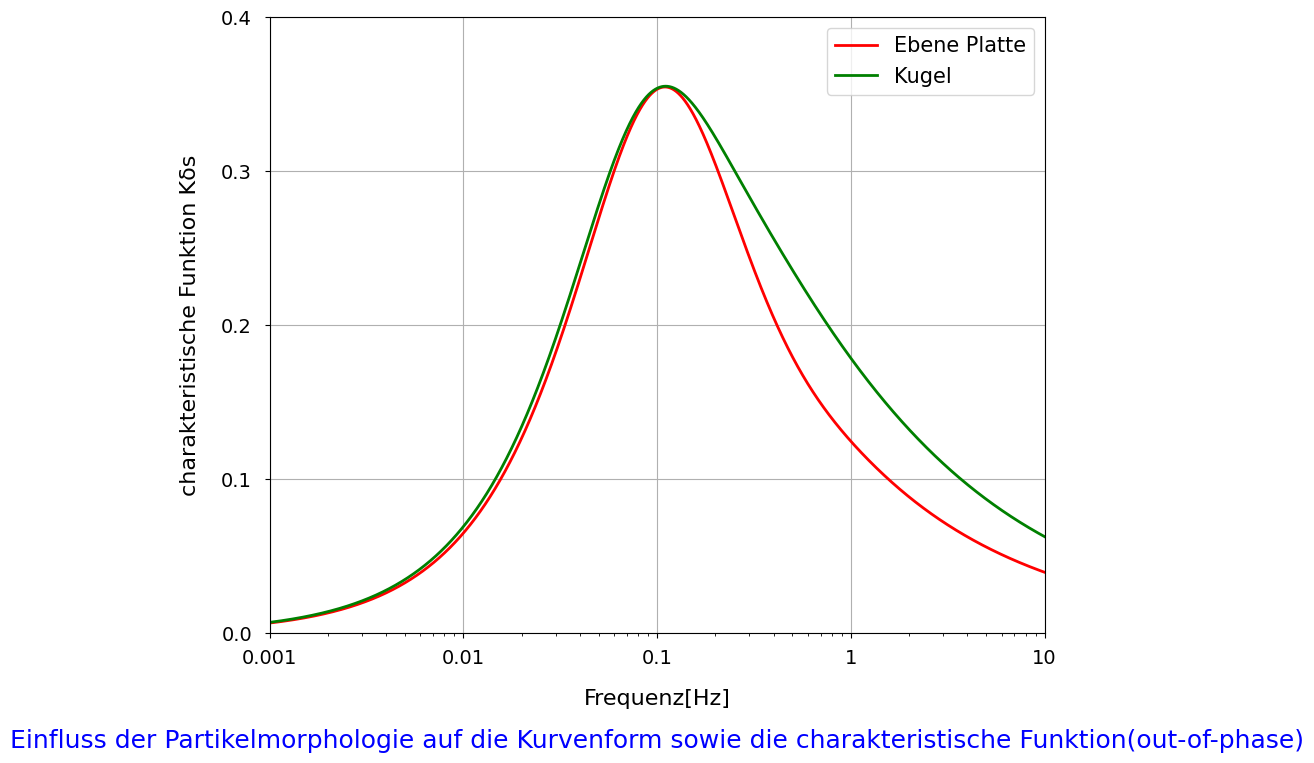

In [10]:
# die Funktion beschreibt die charakteristischen Funktionen von Platten-/Kugelmodell (out-of-phase)
# Die Funktion erwartet eine Liste von Diffusionskoeffizientenwerten
def th_chara_out_pm_1(a, L, list_D, f, list_K):
    labels = ['Ebene Platte', 'Kugel']
    colors = ['r', 'g']
    plt.figure(figsize = (10,8))
    
    x, platte, kugel = [f, pl(L, list_D[0], f, list_K[0]), kl(a, list_D[1], f, list_K[1])]
    y = [platte.func_chara_1s(), kugel.func_chara_3s()]
    for i in range(2):
        plt.plot(x, y[i], label = labels[i], linewidth = 2, color=colors[i])
    
    plt.xlim(0.001,10), plt.ylim(0,0.4), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1], [0.001,0.01,0.1,1,10], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische Funktion Kδs', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Einfluss der Partikelmorphologie auf die Kurvenform sowie die charakteristische Funktion(out-of-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)

abb_outphase_modell = th_chara_out_pm_1(a = 5e-7, L = 5e-7, list_D=[1.7e-14, 1.5e-14], f = np.linspace(0.001, 10, num = 1000000), list_K = [0.85, 1])
abb_outphase_modell

### **1.3.4 Unterscheidung zweier unabhängiger Diffusionsprozesse**
+ **Multiple Kugel out-of-phase Diffusionsprozesse**
    + Partikeldurchmesser **2a = 1µm**
    + **K = 1**
    + Prozess 1:
        + Diffusionskoeffizienten **D = 1.5^-15 m^2/s**
    + Prozess 2:
        + Diffusionskoeffizienten **D = 1.5^-13 m^2/s**

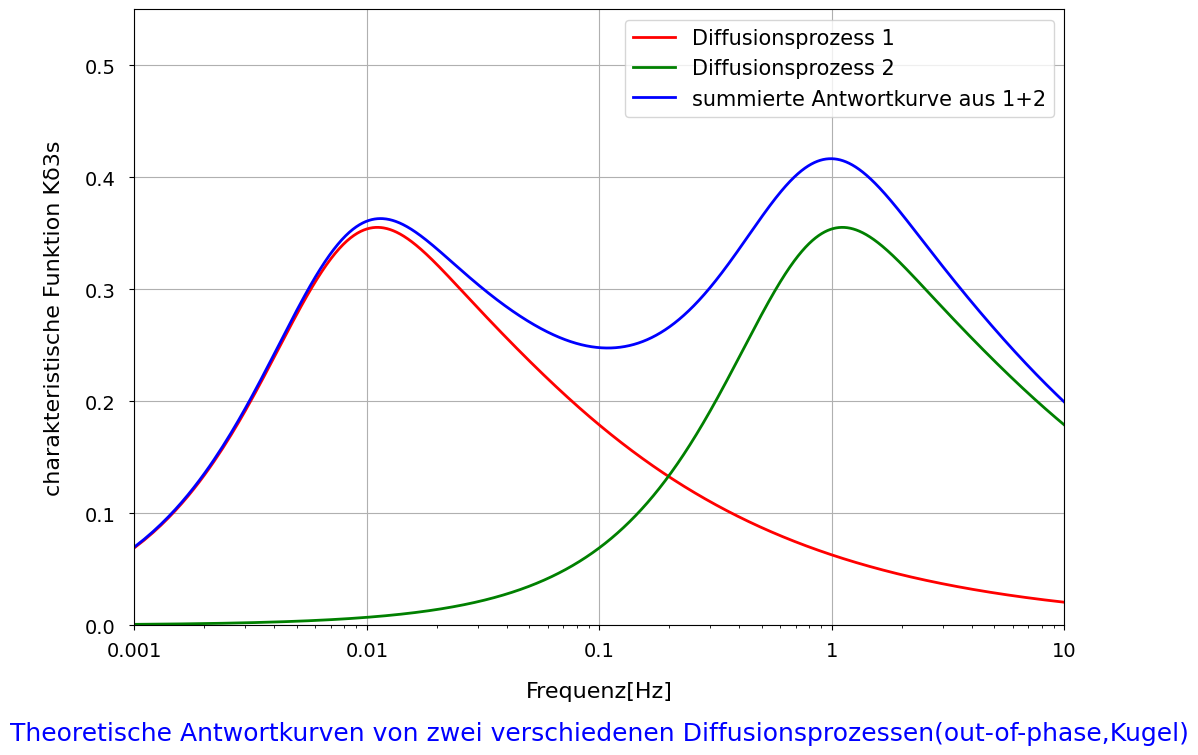

In [11]:
# die Funktion beschreibt Theoretische Antwortkurven von zwei verschiedenen Diffusionsprozessen (out-of-phase)
# Die Funktion erwartet eine Liste von Diffusionskoeffizientenwerten
def th_chara_out_Ml_1(a, list_D, f, list_K):
    labels = ['Diffusionsprozess 1', 'Diffusionsprozess 2', 'summierte Antwortkurve aus 1+2']
    colors = ['r','g','b']
    plt.figure(figsize = (12,8))
    
    x = f
    k_1, k_2 = kl(a, list_D[0], f, list_K[0]), kl(a, list_D[1], f, list_K[1])
    k_3 = m_multiple(list_delta_c=[k_1.func_delta_3c(), k_2.func_delta_3c()], list_delta_s=[k_1.func_delta_3s(), k_2.func_delta_3s()], list_K = list_K)
    y = [k_1.func_chara_3s(), k_2.func_chara_3s(), k_3.func_chara_s()]
    
    for i in range(3):
        plt.plot(x, y[i], label = labels[i], linewidth = 2, color=colors[i])
    
    plt.xlim(0.001,10), plt.ylim(0,0.55), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1], [0.001,0.01,0.1,1,10], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische Funktion Kδ3s', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Theoretische Antwortkurven von zwei verschiedenen Diffusionsprozessen(out-of-phase,Kugel)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)

abb_outphase_Multiple_1 = th_chara_out_Ml_1(a = 5e-7, list_D=[1.5e-15, 1.5e-13], f = np.linspace(0.001, 10, num = 100000), list_K=[1,1])
abb_outphase_Multiple_1

+ **Multiple Kugel out-of-phase Diffusionsprozesse**
    + Partikeldurchmesser **2a = 1µm**
    + **K = 1**
    + Prozess 1:
        + Diffusionskoeffizienten **D = 1e-15 m^2/s**
    + Prozess 2:
        + Diffusionskoeffizienten **D = 1.2e-15 m^2/s**

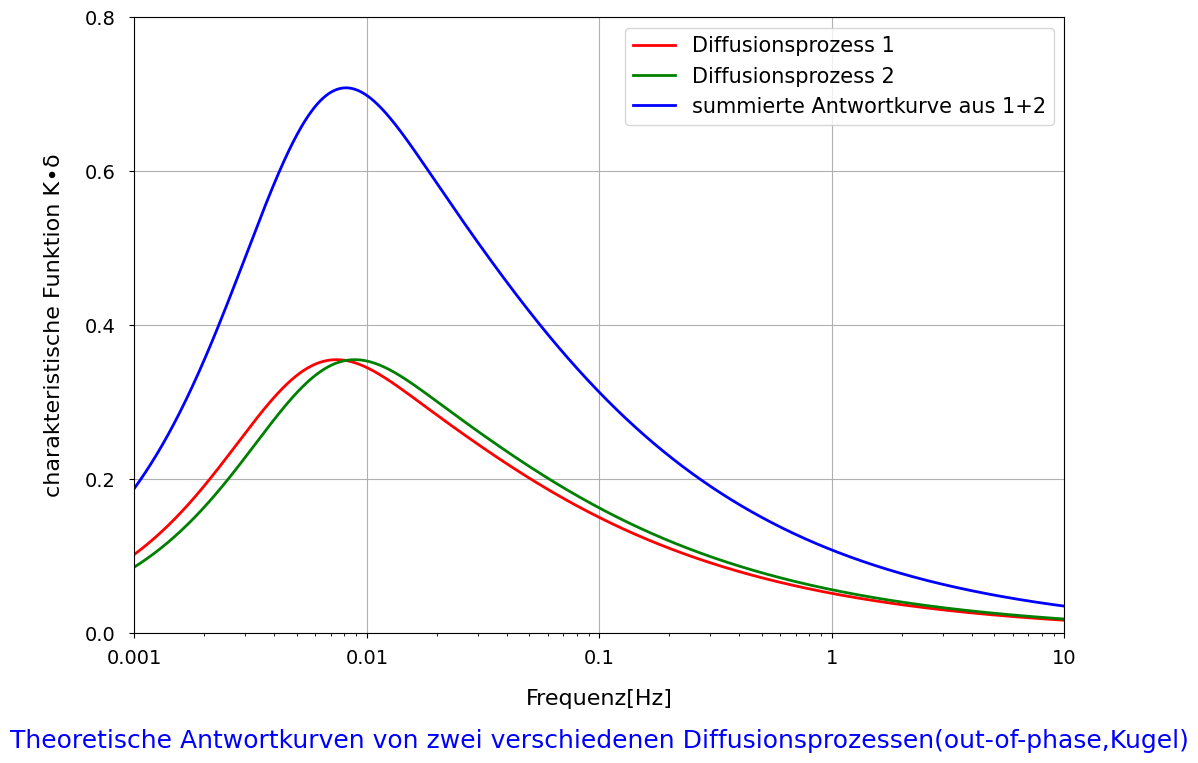

In [12]:
def th_chara_out_Ml_2(a, list_D, f, list_K):
    labels = ['Diffusionsprozess 1', 'Diffusionsprozess 2', 'summierte Antwortkurve aus 1+2']
    colors = ['r','g','b']
    plt.figure(figsize = (12,8))
    
    x = f
    k_1, k_2 = kl(a, list_D[0], f, list_K[0]), kl(a, list_D[1], f, list_K[1])
    k_3 = m_multiple(list_delta_c=[k_1.func_delta_3c(), k_2.func_delta_3c()], list_delta_s=[k_1.func_delta_3s(), k_2.func_delta_3s()], list_K = list_K)
    y = [k_1.func_chara_3s(), k_2.func_chara_3s(), k_3.func_chara_s()]
    
    for i in range(3):
        plt.plot(x, y[i], label = labels[i], linewidth = 2, color=colors[i])
    
    plt.xlim(0.001,10), plt.ylim(0,0.8), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1], [0.001,0.01,0.1,1,10], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische Funktion K∙δ', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Theoretische Antwortkurven von zwei verschiedenen Diffusionsprozessen(out-of-phase,Kugel)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15)
    plt.grid(True)
    
abb_outphase_Multiple_2 = th_chara_out_Ml_2(a = 5e-7, list_D=[1e-15, 1.2e-15], f = np.linspace(0.001, 10, num = 1000000), list_K=[1,1])
abb_outphase_Multiple_2

### **1.3.5 Effekte auf den Kurvenverlauf bei nichtisothermem Verhalten und in hierarchischen Porensystemen**
+ **Initialieren**
    + Kugelmodell
        + **2r = 1µm**
        + **K = 1**
        + Diffusionskoeffizienten **D = 1.5*10^-13 m^2/s**
    + nichtisothermisches Verhalten
        + Zeitkonstante für den Wärmeaustausch zwischen dem Adsorptionsmittel und seiner Umgebung t_h = 1s
        + ein Maß für die Nichtisothermie des Adsorbat-Adsorbens-Systems  gamma = 0.5
    + hierarchische Porensystem
        + Zeitkonstante für den Massenaustausch zwischen den beiden Porensorten t_R = 2.5s
        + relative Gleichgewichtskonstante der Konzentration in den Speicherporen im Verhältnis zu den Transportporen K_omega = 0.4

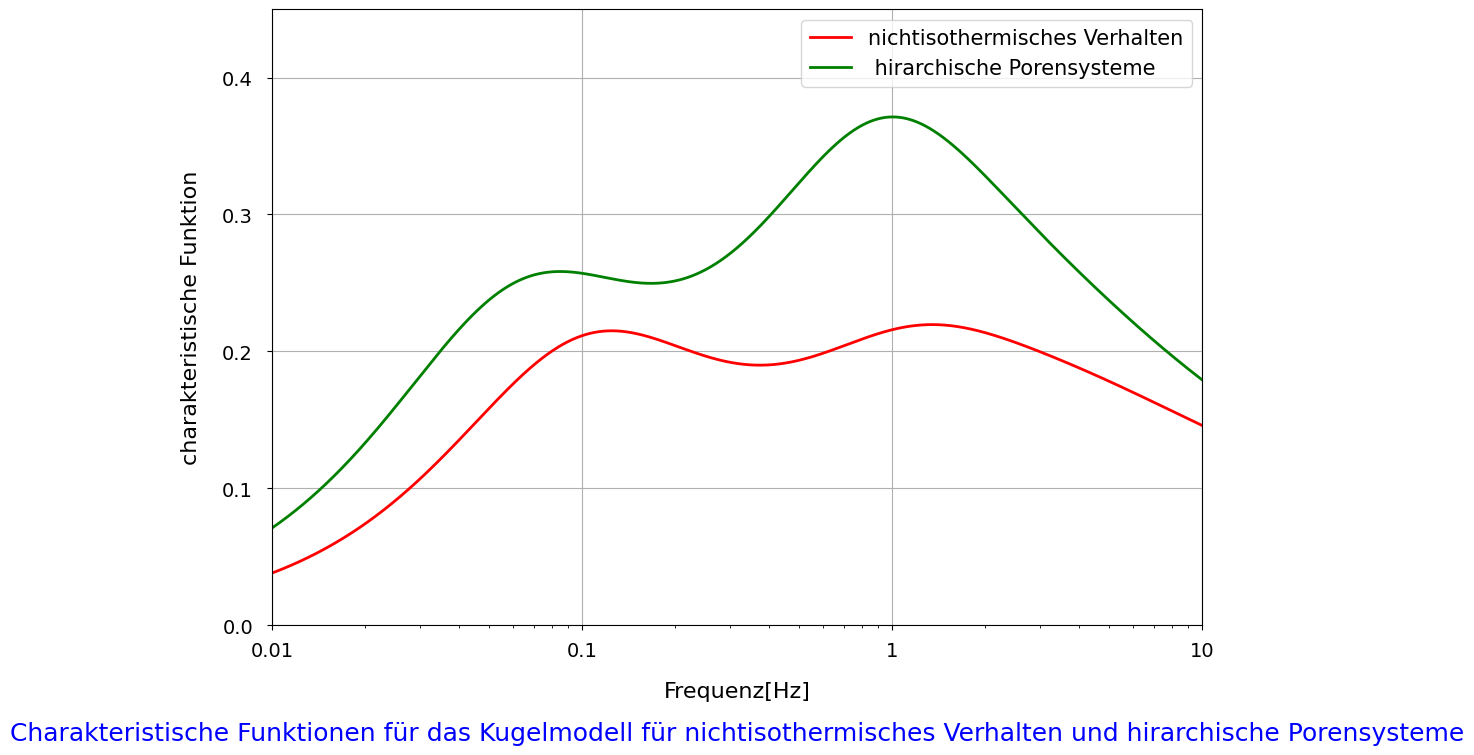

In [13]:
# die Funktion beschreibt Theoretische Antwortkurven von zwei verschiedenen Diffusionsprozessen (inphase)
# Die Funktion erwartet eine Liste von Diffusionskoeffizientenwerten und eine List von K
def th_chara_out_noniso_hierach_1(a, D, f, K, t_h, gamma, t_R, K_omega):
    labels = ['nichtisothermisches Verhalten', ' hirarchische Porensysteme']
    colors = ['r', 'g']
    plt.figure(figsize = (12,8))
    
    x, k = f, kl(a, D, f, K)
    m = [m_noniso(f=f, list_delta_c=[k.func_delta_3c()], list_delta_s=[k.func_delta_3s()], list_K=[K], t_h=t_h, gamma=gamma),
         m_hierarchisch(f=f, list_delta_c=[k.func_delta_3c()], list_delta_s=[k.func_delta_3s()], list_K=[K], t_R=t_R, K_omega=K_omega)]
    y = [m[0].func_chara_noniso_s(), m[1].func_chara_hierar_s()]
    
    for i in range(2):
        plt.plot(x, y[i], label=labels[i], linewidth=2, color=colors[i])

    plt.xlim(0.01, 10), plt.ylim(0, 0.45), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-2, 10**-1, 10**0, 10**1], [0.01,0.1,1,10], rotation=0, fontsize=14, y=-0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4], rotation=0, fontsize=14, x=-0.01)
    
    plt.ylabel('charakteristische Funktion', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Charakteristische Funktionen für das Kugelmodell für nichtisothermisches Verhalten und hirarchische Porensysteme",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)
    
abb_noniso_hierach = th_chara_out_noniso_hierach_1(a=5e-7, D=1.5e-13, f=np.linspace(0.001, 10, num = 100000), K=1, t_h=1, 
                                                   gamma=0.5, t_R=2.5, K_omega=0.4)
abb_noniso_hierach